<a href="https://colab.research.google.com/github/EDANHS/ADA-informes/blob/main/Correcci%C3%B3n_Informe2_MergeSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Merge-Sort**


El algoritmo fue inventado por **John Von Neumann** en 1945. Esta en la categoría de algoritmos de ordenamiento de datos; posee un tiempo de ordenamiento $O(n log n)$ para valores $v \in R$, mejor dicho se puede ocupar para cualquier valor real y el algoritmo funcionará de manera correcta.

# **1. Descripción del problema**

Mergesort es un algoritmo de ordenamiento para arreglos. Se basa en la estrategia de **divide y vencerás**, donde compara valores para ordenar el arreglo. El algoritmo mantiene los elementos de entrada, pero permutados en un orden ascendente.


El algoritmo empieza con una lista de tamaño **'n'** y luego va aplicando su lógica. Se espera:

$Entrada:$ Secuencia de 'n' elementos en una lista $<a_1,a_2,…a_n>$ 

$Salida:$ Permutación ordenada de la lista con los mismos **'n'** elementos $<a_1',a_2',…a_n'>$ tal que $[a_1'\leq a_2' \leq… \leq a_n']$

# **2. Descripción del algoritmo**

El algoritmo MergeSort realiza llamadas recursivas para ordenar **'fracciones'** de la lista. Según la función propuesta debemos ir acortando el rango de nuestra lista hasta un caso base para empezar a ordenar los elementos que esta contiene, todo esto se basa en el paradigma **divide y vencerás**.

El paradigma divide y vencerás se compone de tres puntos principales:

 * Divide.
 * Resuelve.
 * Combina.


##2.1 Como se aplica el paradigma, divide y vencerás en función MergeSort

En MergeSort se aplica de la siguiente forma:

* $Divide$ *el problema entrante en subproblemas de tamaño n/2 y n/2 (esto puede variar en problemas de tamaño n impares).* Esto se repite hasta llegar a un caso base.
* $Resuelve$ *cada subproblema con recursividad aplicando el algoritmo de la función Merge en cada uno de ellos.*
* $Combina$ *dos subproblemas entrantes en uno solo ordenando sus elementos a medida que los junta mediante comparación.*


##2.2 Descripción de función MergeSort

En una lista de **'n'** elementos que comienza con índice 0 y el tamaño del arreglo menos uno:

1. La lista se va dividiendo en mitades, esto genera un árbol de recursión con particiones de n/2(creando sub-arreglos o sub-listas en cada llamada recursiva), hasta llegar a la unidad.

2. Como cada una de estas partes son de tamaño 1, se considera que están ordenadas, pero siguen siendo considerados una lista.

2. Luego, son comparados los elementos de ambas sub-lista ($a[0:tamaño sub-lista] <= b[0:tamaño sub-lista]$) e insertados en la lista original, dependiendo de cuál sea el menor.

3. El proceso se va repitiendo hasta devolver la lista con los mismos elementos permutados de menor a mayor.

##2.3. Descripción de función Merge

Esta función recibe como parámetros el arreglo original, y tres enteros que representan el inicio del sub-arreglo $(p)$, el final del sub-arreglo $(r)$ y el punto medio entre ambos sub-arreglos $(q)$.

Primero se crean dos arreglos auxiliares:

* A1 que va desde $p$ hasta $q$ en $A$, que corresponde al arreglo original en dicho intervalo.

* A2 que va desde $q+1$ hasta $r$ en $A$, que corresponde al arreglo original en dicho intervalo.

Luego se realiza un ciclo con $r-p$ iteraciones, teniendo dos valores auxiliares enteros que representan las posiciones de cada arreglo auxiliar partiendo ambas en 0:

* Empezamos comparando los primeros elementos de A1 y A2 ($A1[cont1] : A2[cont2]$), el elemento que sea menor o igual en dicha comparación se inserta en $A$ en $p+1$, y se aumenta el valor del contador correspondiente al arreglo auxiliar en 1, luego para el segundo elemento ocurre la misma comparación, pero se inserta en $p+2$, esto sigue asi hasta $r$.

* Puede ocurrir, que un arreglo auxiliar se quede sin elementos para comparar, excediendo su tamaño ($[p:q] :o: [q+1,r]$), si esto ocurre se copian los elementos restantes del otro arreglo auxiliar en  $A$ sin realizar comparaciones.

Al finalizar el ciclo de $r-p$ iteraciones, el arreglo que va de $p$ hasta $r$ en $A$ estará ordenado de menor a mayor.


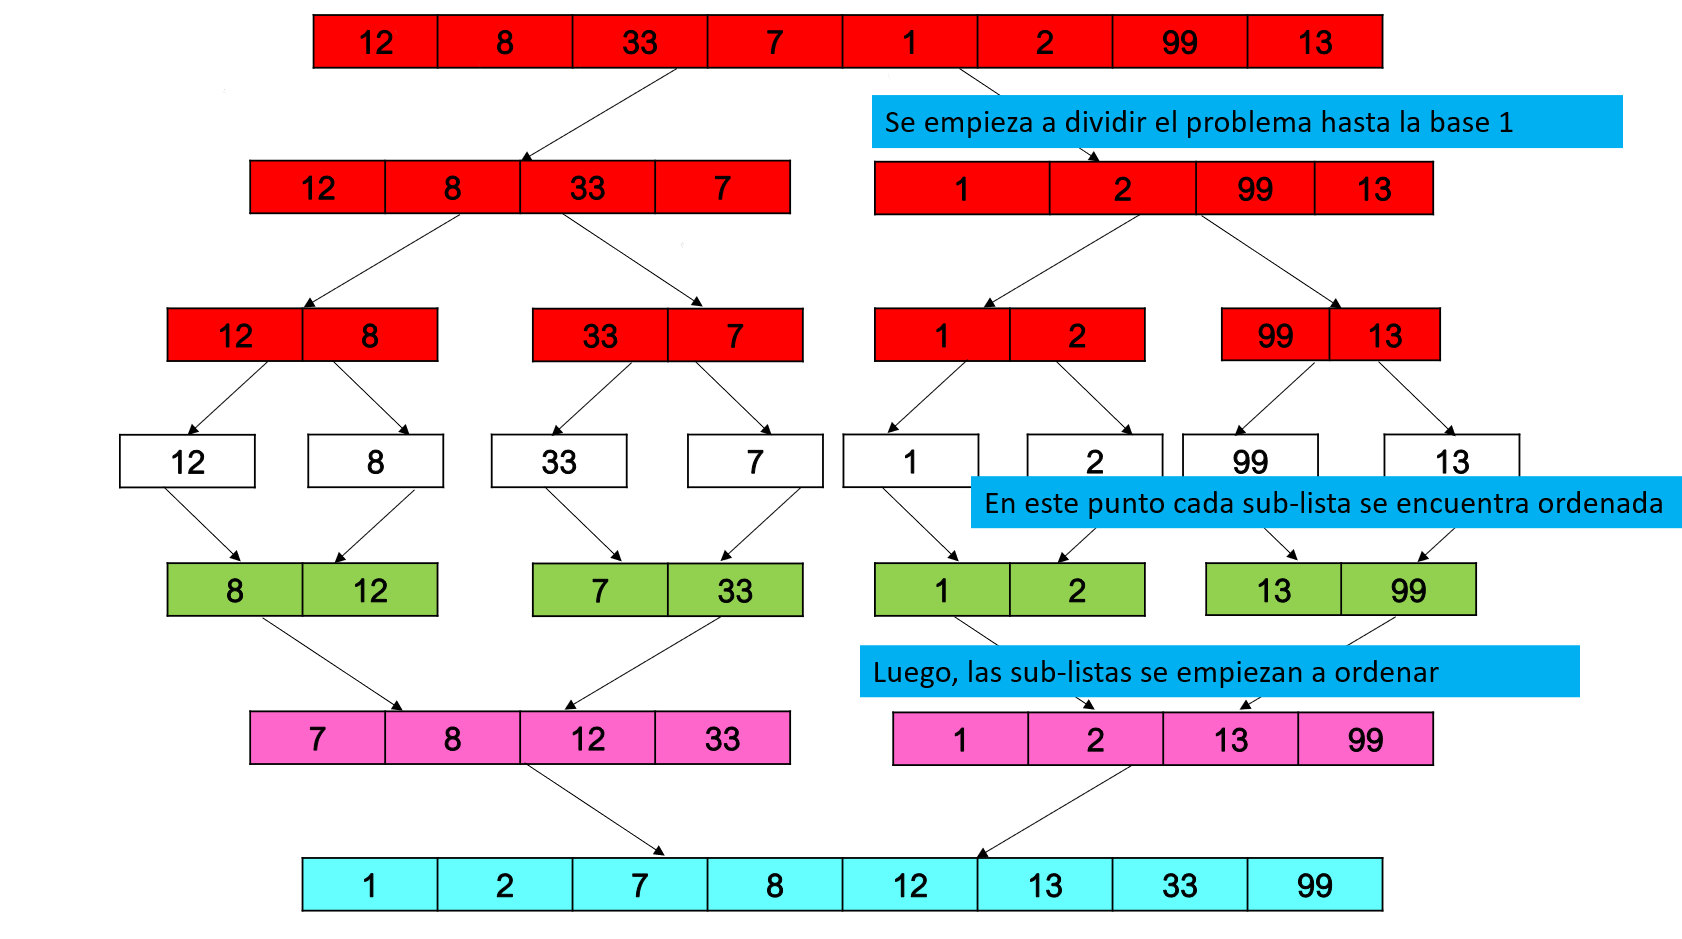

##2.4. Código MergeSort

Implementación del algoritmo MergeSort, basándose en la función propuesta en la guía.

In [2]:
from termcolor import colored

In [3]:
#Función MergeSort propuesta en la guía

def MergeSort(A, p, r,Verbose = False):
  global llamadaRecursiva
  
  if p==r: return
  llamadaRecursiva+=1
  q = int((p+r)/2) #elemento medio del arreglo
  if Verbose == True and len(A[p:q]) > 0:
    print("------------------------------------------------")
    print("Función MergeSort")
    print("Creando rama derecha:", A[p:q])
    print("------------------------------------------------\n")
  MergeSort(A,p,q,Verbose) #ordena la parte izquierda del arreglo
  if Verbose == True and len(A[q+1:r]) > 0:
    print("------------------------------------------------")
    print("Función MergeSort")
    print("Creando rama izquierda:", A[q+1:r])
    print("------------------------------------------------\n")
  MergeSort(A,q+1,r,Verbose) #ordena la parte derecha del arreglo
  if Verbose == True and len(A[q+1:r]) > 0 and len(A[p:q]) > 0:
    print("\nEntrada a función Merge para ordenar:",A[p:q],"y",A[q+1:r],"\n")
  Merge(A,p,q,r,Verbose) #combina y ordena ambos subarreglos ordenados


In [4]:
#Función Merge

def Merge(A,p,q,r,Verbose=False):
  global contador
  #Creo dos listas auxiliares
  A1 = A[p:q+1]
  A2 = A[q+1:r+1]
  #Indices para ir moviendose en ambas listas respectivamente
  izq = 0
  der = 0
  
  for i in range(p,r+1):
    if Verbose == True:
      print("-----------------------------------------------")
      print("Función Merge")

    ##Ciclos para rellenar valores faltantes en alguna lista
    if izq == len(A1):
      for k in range(i,r+1):
        A[k] = A2[der]
        der+=1
        contador+=1
      break
    if der == len(A2):
      for k in range(i,r+1):
        A[k] = A1[izq]
        izq+=1
        contador+=1
      break

    ##Comparacion de elementos de las listas
    contador+=1
    if A1[izq] <= A2[der]:
      A[i] = A1[izq]
      izq+=1
    else:
      A[i] = A2[der]
      der+=1
    if Verbose==True:
      print("Comparación entre sub-listas...")
      print("Sub-listas:",A[:p],colored(A[p:q+1],"blue"),colored(A[q+1:r+1],"red"),A[r+1:])
      
  if Verbose == True:
    print("Resultado final:",A)
    print("-----------------------------------------------")
    

## Ejemplo de entrada y salida

In [5]:
A = [1,2,3,6,1,3]

global contador
global llamadaRecursiva
llamadaRecursiva = 0
contador = 0

print("Lista de entrada: ",A)
MergeSort(A,0,len(A)-1,Verbose=False)
print("Lista de salida: ",A)
print("Comparaciones:",contador)
print("Llamadas recursivas:",llamadaRecursiva)

Lista de entrada:  [1, 2, 3, 6, 1, 3]
Lista de salida:  [1, 1, 2, 3, 3, 6]
Comparaciones: 16
Llamadas recursivas: 5


##2.4. Ejemplo paso a paso

Veamos en pasos sencillos lo que hace el MergeSort teniendo la siguiente lista:

      z = [4,13,1,86,45]

1. La función recursiva se va llamando hasta llegar a la unidad, generando la rama derecha del árbol de recursión, cuando ya llega a un caso base se considera que las sublistas están ordenadas:

        z = [4 , 13 , 1 , 86 , 45]

        z = [4 , 13 ] [ 1 , 86 , 45]

        z = [ 4 ]  [ 13 ]  [ 1 , 86 , 45 ]

2.Una vez están en el caso base, los datos entran en la función Merge, donde son ordenados por comparación de elementos:

        sublista1 = [4]
        sublista2 = [13]

        Comparación: ¿Cuál es menor? -> ¿4 o 13?

        Se reemplaza el menor en z, y luego se inserta el restante.

        z = [4 , 13 , 1 , 86 , 45]

        Se acaba la función, por ello volvemos a la llamada a la función MergeSort anterior quedando el siguiente arreglo 'partido' en ramas

        z = [ 4 , 13 ]  [ 1 , 86 , 45 ]

        Se crea una nueva rama del árbol de recursión

        z = [ 4 , 13 ]  [ 1 ] [ 86 , 45 ]

        Como aun no se cumple el caso base, el cual es dejar sublistas con 1 elemento se vuelve a crear una rama.

        z = [ 4 , 13 ]  [ 1 ] [ 86 ] [ 45 ]

        Se ordenan los elementos de la última partición

        z = [ 4 , 13 ]  [ 1 ] [ 45 , 86 ]

        Se retorna a la última llamada recursiva de MergeSort y se vuelven a ordenar las dos sublistas

        z = [ 4 , 13 ]  [ 1 , 45 , 86 ]

        Se vuelve a retorna y se ordena por última vez

        sublista1: [ 4 , 13 ]

        sublista2: [ 1 , 45 , 86 ]

        Comparación: ¿4 o 1? (Se busca el menor y se inserta en z)

        z = [ 1 , 13 , 1 , 45 , 86 ]

        sublista1: [ 4 , 13 ]

        sublista2: [ 45 , 86 ]

        Comparación: ¿4 o 45? (Se busca el menor y se inserta en z)

        z = [ 1 , 4 , 1 , 45 , 86 ]

        sublista1: [ 13 ]

        sublista2: [ 45 , 86 ]

        Comparación: ¿13 o 45? (Se busca el menor y se inserta en z)

        z = [ 1 , 4 , 13 , 45 , 86 ]

        sublista1: [ ]

        sublista2: [ 45 , 86 ]

        Comparación: Como ya no quedan elementos en una sublista se rellena z con los elementos restantes.

        z = [ 1 , 4 , 13 , 45 , 86 ]


3. Finalmente, nos queda un solo arreglo ordenado de menor a mayor y con sus elementos originales.

        z = [ 1 , 4 , 13 , 45 , 86 ]


##2.5. Ejecución del algoritmo con Verbose = True

Al pasar Verbose con valor **True** podemos observar los pasos que realiza el MergeSort dentro de la función Merge. 

In [6]:
import random

In [7]:
global contador
global llamadaRecursiva
llamadaRecursiva = 0
contador = 0
B = random.sample(range(1, 100), 10)
print("Lista de entrada: ",B)
MergeSort(B,0,len(B)-1,Verbose=True)
print("Total de comparaciones: ",contador)
print("Total de llamadas recursivas: ",llamadaRecursiva)

Lista de entrada:  [70, 13, 31, 19, 35, 22, 27, 81, 99, 97]
------------------------------------------------
Función MergeSort
Creando rama derecha: [70, 13, 31, 19]
------------------------------------------------

------------------------------------------------
Función MergeSort
Creando rama derecha: [70, 13]
------------------------------------------------

------------------------------------------------
Función MergeSort
Creando rama derecha: [70]
------------------------------------------------

-----------------------------------------------
Función Merge
Comparación entre sub-listas...
Sub-listas: [] [13] [13] [31, 19, 35, 22, 27, 81, 99, 97]
-----------------------------------------------
Función Merge
Resultado final: [13, 70, 31, 19, 35, 22, 27, 81, 99, 97]
-----------------------------------------------
-----------------------------------------------
Función Merge
Comparación entre sub-listas...
Sub-listas: [] [13, 70] [31] [19, 35, 22, 27, 81, 99, 97]
--------------------

# **3. Correctitud del algoritmo**

A continuación se explicará la correctitud de la función Merge mediante la propiedad de bucle invariante y la correctitud de MergeSort mediante inducción.

##3.1 Correctitud Merge

Para probar la correctitud de la función Merge estableceremos el siguiente teorema el cual se probará mediante la propiedad de bucle invariante.

$Teorema:$ El algoritmo Merge genera una lista ordenada a partir de otras sublitas de entrada, de modo que, sus elementos quedan ordenador de menor a mayor $[a_1'\leq a_2' \leq… \leq a_n']$


En base a esto daremos los parametros iniciales que siempre se cumple al comienzo de la función Merge. Antes de empezar el bucle se cuenta con el arreglo de entrada $A$ de $n$ elementos, además de valores $p, q$ y $r$ que corresponden a: el punto de partida, el punto intermedio y el punto final de arreglo entrante que esta entre 0 y $n$ representando los indices de $A$ respectivamente.

Dado lo anteriormente descrito, se crean dos arreglos auxiliares con los elementos desde $A1[p:q]$ y $A2[q+1:r]$, los cuales corresponden a los $r-p$ elementos más pequeños en $A$ ordenados de menor a mayor.

Además, los elemntos $A1[0]$ y $A2[0]$ son los elementos más pequeños en ambos subarreglos no ordenados en $A$.

La propiedad que sigue el algoritmo Merge es la siguiente:

* Al inicio de cada iteración el arreglo de entrada $A$ tiene entre el intervalo $r - p + i$ e $r$ contiene los elementos más pequeños no ordenados de cada subarreglo auxiliar.

---
**Inicialización:** Antes de cada iteración se tiene que el bucle empieza en $p$, con un iterable $i$, donde $i = p$, por ello $A$ posee $i - p$ espacios de almacenamiento (está vacio), además que los iteradores $izq$ y $der$ de cada subarreglo parten en 0, en consecuencia $A1[izq]$ y $A[der]$ corresponden a los elementos más pequeños de cada uno respectivamente sin ser copiados.

---
**Mantención:** Para cada iteración tenemos que uno de los siguientes elementos corresponderá al menor y será copiado en $A$, $A1[izq]$ o $A2[der]$, entonces para los $r-p$ elementos más pequeños en $A$ después de insertar uno de los números en $A[i]$ se incrementará $i$ en uno, por ellos se tendrá que en $A$ estarán los $k-p+1$ elementos más pequeños no copiados, cuando se copie uno se aumentará $izq$ o $der$ en 1, y al inicio de cada iteración se restablecerá la invariante de bucle volviendo a comparar, insertar y aumentar iteradores en cada iteración. Esto finaliza cuando todos los elementos de $A1$ y $A2$ son copiados en $A$.

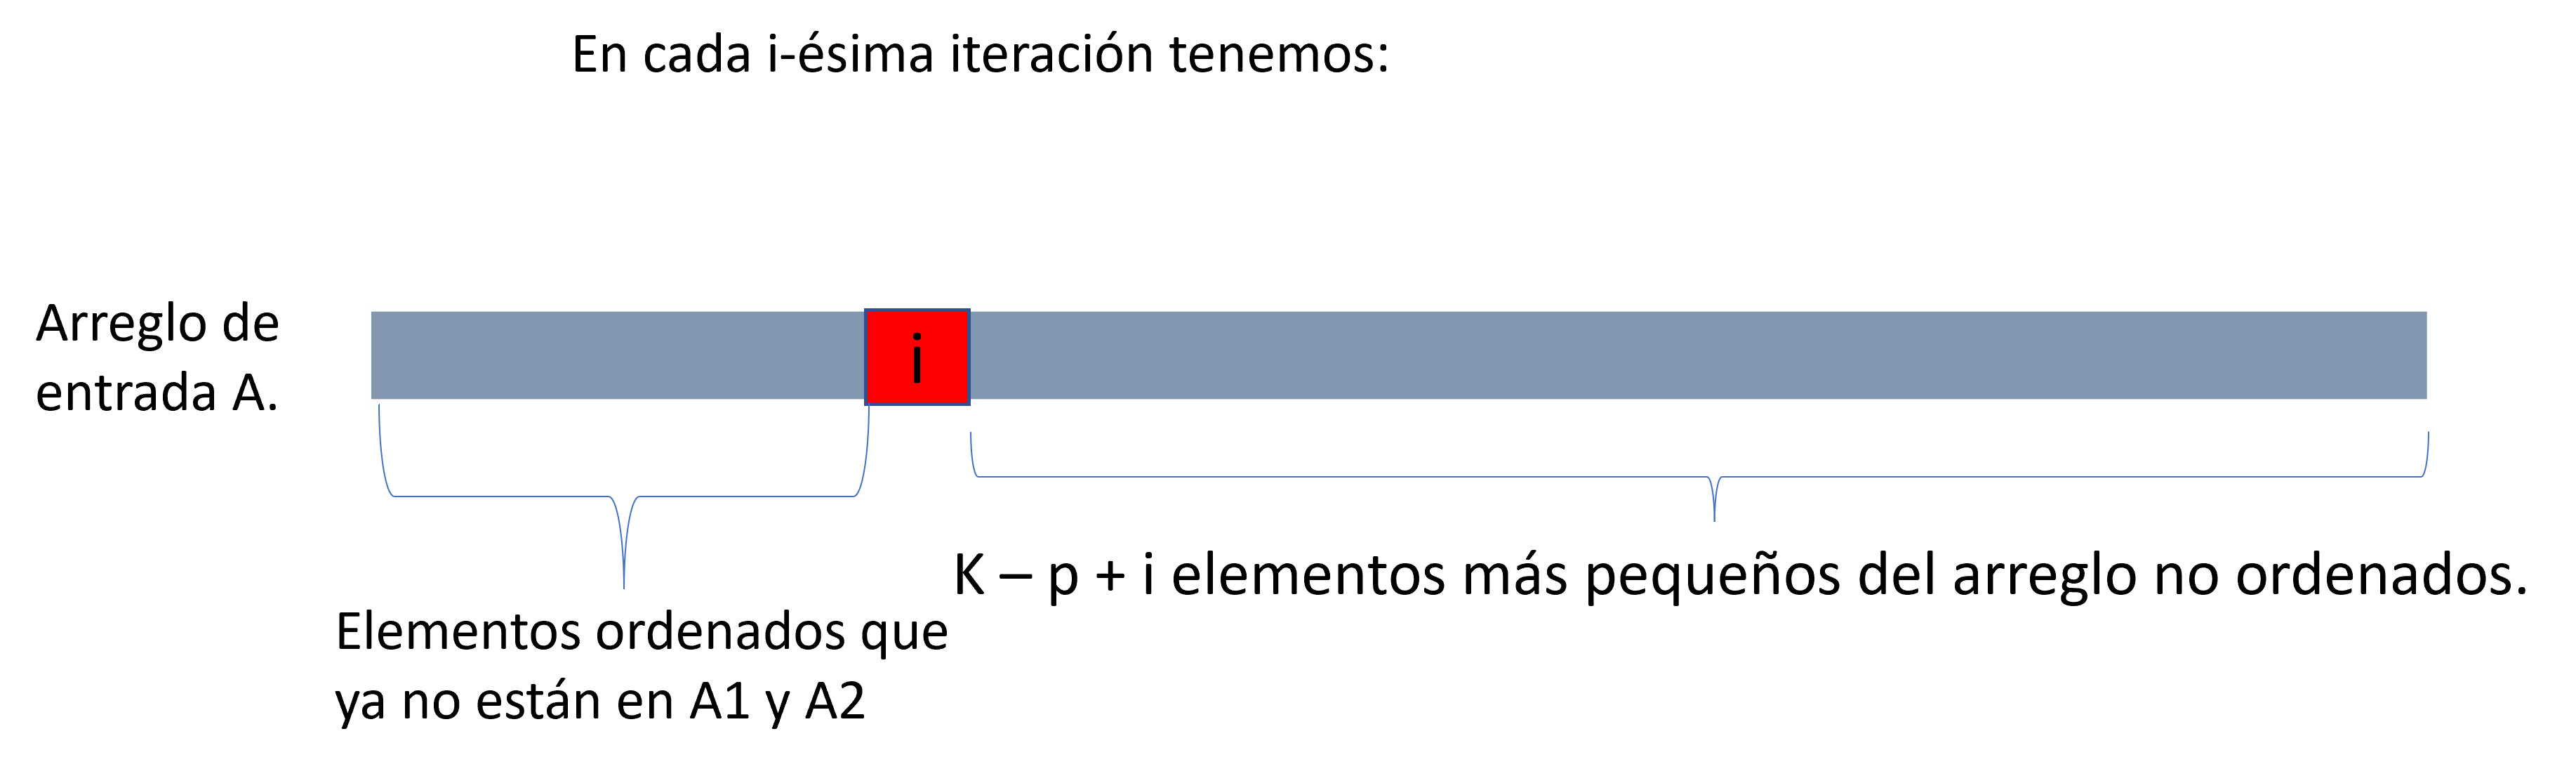

Como el algoritmo compara elementos  e inserta el más pequeño entre los intervalos $p:r$ nos asegura que devolverá un arreglo ordenado en ese intervalo, demostrando que es correcto.

##3.2 Correctitud MergeSort

Teorema: El algoritmo MergeSort genera una lista ordenada a partir de los mismos elementos de esta.



Hipotesis para P(n): MergeSort retorna una lista ordenada de menor a mayor para **n** elementos.

**Caso base P(1)**: cuando n = 1, tenemos un único elemento a retornar y este se encuentra ordenado por razones obvias

**Paso inductivo P(m)**: Para los **n** elementos que hay en una lista, MergeSort va dividiendo el problema a la mitad con dos sub-listas y ordenando sus elementos.

      k = [n/2]  ;  k = [n/2]

Al ser k < n, se asume que estas sub-listas están en orden de menor a mayor y serán ordenadas correctamente. Según nuestro teorema del Merge, las sub-listas se ordenarán. En conclusión, MergeSort tiene un funcionamiento correcto y ordena la lista de **n** elementos.


##3.3 Tiempo de ejecución

Teorema: El algoritmo MergeSort tiene tiempo de ejecución O($n * log(n)$) en su mejor y peor caso.



Primero tengamos en cuenta para n elementos lo que hace el algoritmo de MergeSort, este va dividiendo en dos partes los n elementos, por tanto, para un problema T(n) en recursión, es equivalente a 2T(n/2) (La mitad del problema que se volverá a dividir entre dos, multiplicado por dos) más el caso actual que se puede representar como **cn** donde c es una constante, esta constante sirve también para representar la O(1) en su caso base cuando $n$ vale 1.

Finalmente, tenemos la función recursiva:

* $T(n) = 2T(n/2) + O(n)$

En el fondo se deben ir fraccionando recursivamente en $n/2$ arreglos cada entrada, las cuales se resuelven en tiempo $O(n)$ en Merge, cada parte que se parte al ser mitades genera un árbol de recursión de altura $log_2{n}$ hasta llegar a un caso base, donde cada subarreglo de tamaño $n/2$ respecto a la entrada se debe resolver en tiempo $O(n)$ como se mencionó antes. Si multiplicamos ambos valores tenemos nuestra complejidad de $O(n*log_2{n})$, lo cual, al eliminar las constantes nos queda una complejidad de $O(n*log n)$

Visualmente tenemos esto:


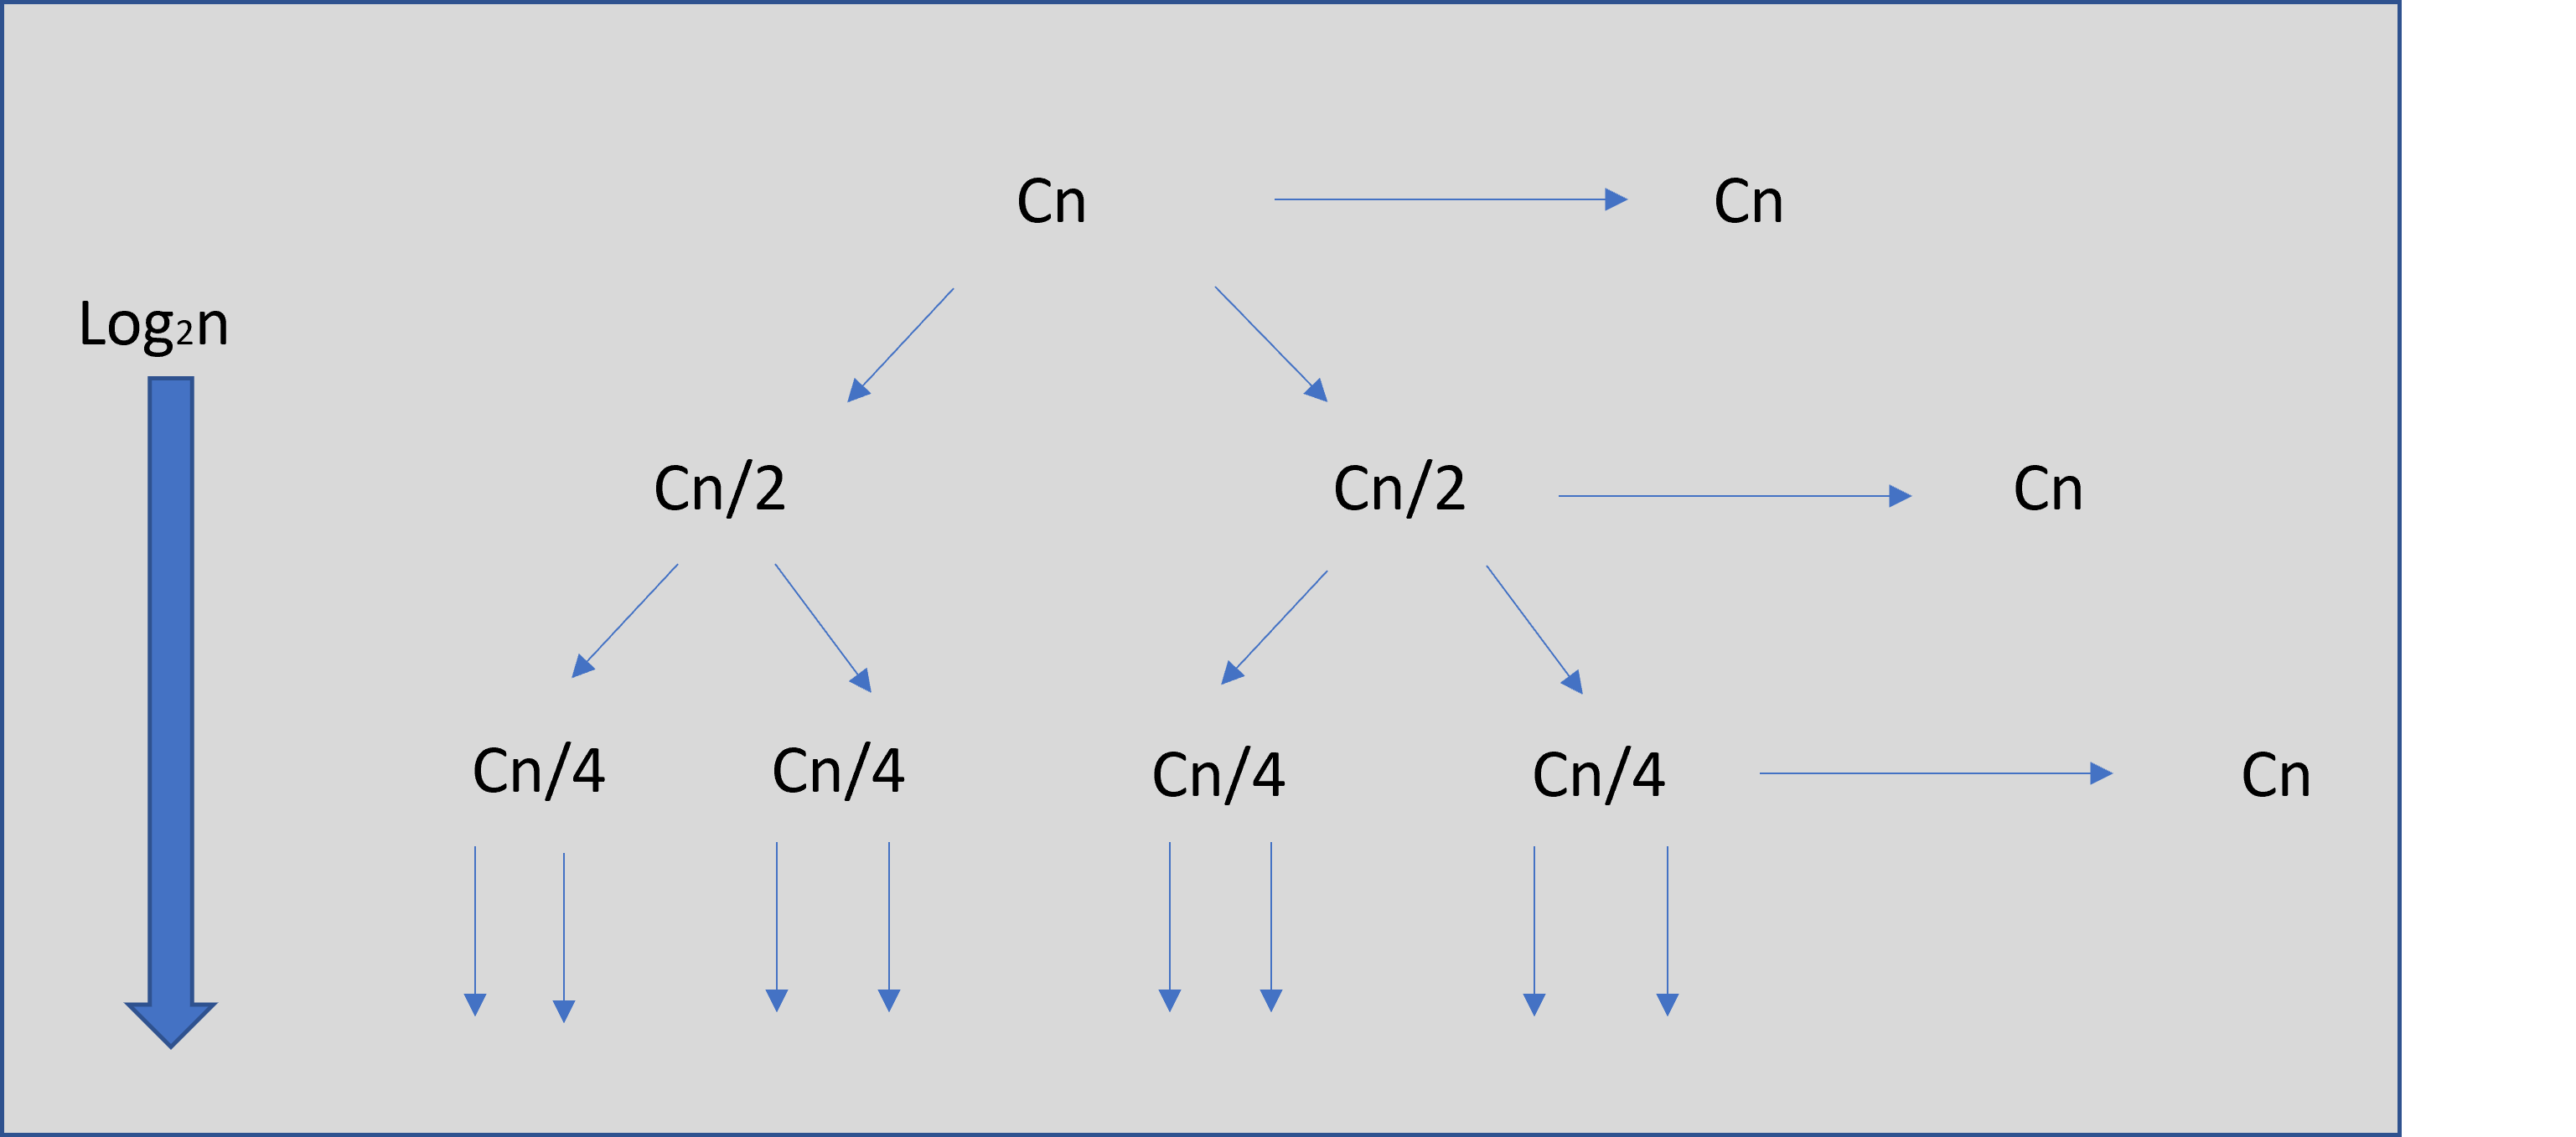

Como el algoritmo funciona siempre igual sea una entrada arbitraria su mejor y peor caso opera en $O(n*logn)$.

# **4. Experimentos**

## 4.1 Número de comparaciones

En la siguiente sección se hará una comparación entre el peor caso teórico del algoritmo MergeSort y casos experimentales para $n$ elementos.

Se debe tener en cuenta:

* $n$ se mueve entre 5 y 30, además que los números que contendrá irán desde 1 hasta 100.
* El peor caso y el mejor caso teóricamente son el mismo, así que, para representar cada uno, usaré las siguientes fórmulas respectivamente:

Peor caso: $n*log_2(n)$

Mejor caso: $n*log(n)$

In [8]:
import matplotlib.pyplot as plt
import random
from math import log2

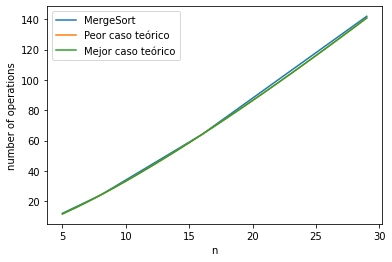

In [9]:
x=[n for n in range(5,30)] 
y1=[n*log2(n) for n in range(5,30)] # worst case
y2=[(n)*log2(n) for n in range(5,30)] # best case
y=[]; 

for n in range(5,30):
  global contador
  contador = 0
  a = random.sample(range(1, 100), n)
  MergeSort(a,0,len(a)-1,Verbose=False)
  y.append(contador)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["MergeSort", "Peor caso teórico","Mejor caso teórico"])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()

## Análisis de resultados

Como se mencionó en el análisis del tiempo de ejecución el algoritmo MergeSort tiene una complejidad de $O(n*logn)$ en su mejor y peor caso, esto porque siempre opera de la misma manera, en la gráfica se muestra que los casos teóricos y el análisis real de su tiempo coinciden todas las veces al momento de realizar las comparaciones entre elementos. Finalmente, se puede concluir mediante este experimento que el análisis teórico previamente hecho es correcto, por lo cual, su tiempo de ejecución es correcto.

## 4.2 Tiempo de ejecución MergeSort

Para el siguiente análisis, se realizará una visualización del tiempo de ejecución en MergeSort para arreglos que se moverán entre 5 y 500 en su tamaño.

In [10]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

      1. Primera prueba.

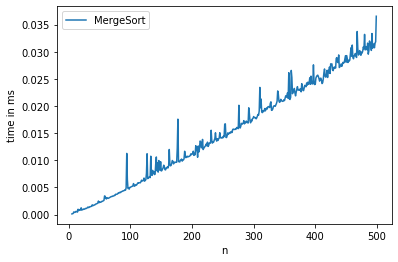

In [11]:
x=[]; y=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)

  #la función repeat está ejecutando 20 veces bubble_sort con el arreglo a y retorna el mejor tiepo obtenido.
  t = repeat(setup="from __main__ import MergeSort", stmt=f"MergeSort({a},{0},{len(a)-1})", repeat=1, number=10)

  x.append(n)
  y.append(t)


plt.plot(x,y)
plt.legend(["MergeSort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

      2. Segunda prueba.

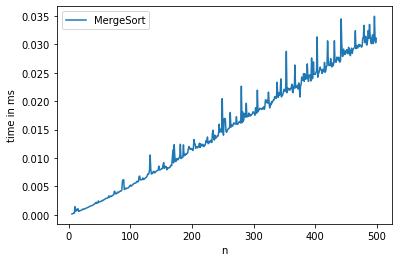

In [12]:
x=[]; y=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)

  #la función repeat está ejecutando 20 veces bubble_sort con el arreglo a y retorna el mejor tiepo obtenido.
  t = repeat(setup="from __main__ import MergeSort", stmt=f"MergeSort({a},{0},{len(a)-1})", repeat=1, number=10)

  x.append(n)
  y.append(t)


plt.plot(x,y)
plt.legend(["MergeSort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

## Análisis de resultados en ambas pruebas

En las dos pruebas realizadas en el tiempo de ejecución con MergeSort, se pueden ver similitudes en sus tiempos de ejecución, los cuales corresponden a la complejidad propuesta teóricamente $O(n*log n)$. Los picos resultantes en la curva son insignificantes que se pueden deber a otros procesos en el procesador. Como resultado de este experimento, las curvas demuestran que el algoritmo opera en tiempo lineal de $n*logn$.

## 4.3 MergeSort vs InsertionSort (Comparaciones)

A continuación, se realizará un análisis en el número comparaciones que hay entre el algoritmo de MergeSort e Insertion Sort

Datos a tener en cuenta:

* $n$ esta entre 5 y 30 de tamaño y serán generados de forma aleatoria.

In [13]:
def InsertionSort(a,verbose=False):

    ## Inicializa una variable con el tamaño del arreglo
    n = len(a)
    iter = 0
    count = 0

    ##variable para obtener la media
    retr = 0

    for i in range(1,n):
      ## clave para realizar el intercambio
      key = a[i]

      ##Impresión de iteración
      iter+=1

      ## Ciclo que va desde [i:0]
      for j in range(i-1,-1,-1):
        count+=1

        ## Realización del intercambio de la clave y ruptura
        ## del ciclo
        if a[j]<key:
          a[j+1] = key
          break
        ## Intercambio general

        a[j+1] = a[j]
        retr+=1

      ## Intercambio general
      if key < a[0] : a[0] = key
    return a, count

      1. Primera prueba.

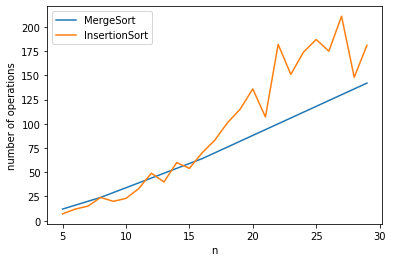

In [14]:
x=[n for n in range(5,30)] 
y=[] 
y1=[]

for n in range(5,30):
  global contador
  contador = 0
  a = random.sample(range(1, 100), n)
  b = random.sample(range(1, 100), n)
  MergeSort(a,0,len(a)-1,Verbose=False)
  b,count=InsertionSort(b,False)
  y.append(contador)
  y1.append(count)

plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["MergeSort","InsertionSort"])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()

      2. Segunda prueba.

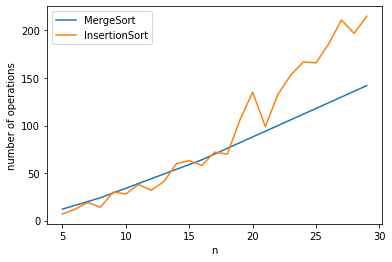

In [15]:
x=[n for n in range(5,30)] 
y=[] 
y1=[]

for n in range(5,30):
  global contador
  contador = 0
  a = random.sample(range(1, 100), n)
  b = random.sample(range(1, 100), n)
  MergeSort(a,0,len(a)-1,Verbose=False)
  b,count=InsertionSort(b,False)
  y.append(contador)
  y1.append(count)

plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["MergeSort","InsertionSort"])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()

##Analisis de resultados

Para ambas pruebas de los algoritmos, se demuestra que el MergeSort para casos grandes empieza a ser más eficientes en comparaciones en contraste con el InsertionSort.

## 4.4 MergeSort vs InsertionSort (Tiempo de ejecución)

Para nuestro último análisis, se realizará una comparación en el tiempo de ejecución que hay entre el algoritmo de MergeSort e Insertion Sort

Datos a tener en cuenta:

* $n$ esta entre 5 y 500 de tamaño y serán generados de forma aleatoria.

    1. Primera prueba

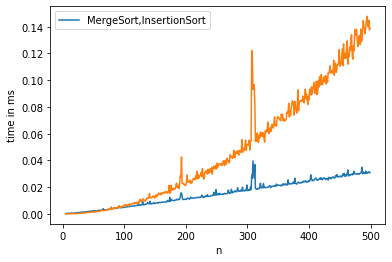

In [18]:
x=[]; y=[] ; y1 = []

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  b = random.sample(range(1, 1000), n)
  #la función repeat está ejecutando 20 veces bubble_sort con el arreglo a y retorna el mejor tiepo obtenido.
  t = repeat(setup="from __main__ import MergeSort", stmt=f"MergeSort({a},{0},{len(a)-1})", repeat=1, number=10)
  t1 = repeat(setup="from __main__ import InsertionSort", stmt=f"InsertionSort({b})", repeat=1, number=10)
  x.append(n)
  y.append(t)
  y1.append(t1)


plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["MergeSort,InsertionSort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

      2. Segunda prueba

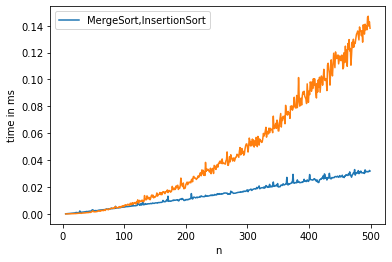

In [17]:
x=[]; y=[] ; y1 = []

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  b = random.sample(range(1, 1000), n)
  #la función repeat está ejecutando 20 veces bubble_sort con el arreglo a y retorna el mejor tiepo obtenido.
  t = repeat(setup="from __main__ import MergeSort", stmt=f"MergeSort({a},{0},{len(a)-1})", repeat=1, number=10)
  t1 = repeat(setup="from __main__ import InsertionSort", stmt=f"InsertionSort({b})", repeat=1, number=10)
  x.append(n)
  y.append(t)
  y1.append(t1)


plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["MergeSort,InsertionSort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

## Análisis de resultados

Para ambos experimentos se puede ver como resultado que MergeSort es siempre lineal, mientras que InsertionSort opera en tiempo cuadrático, por ende se puede concluir que para entradas grande será mucho más lento que MergeSort, finalmente demostrando la eficiencia de este al momento de ordenar datos en un arreglo.

## Enlaces consultados para realizar informe

https://chartreuse-goal-d5c.notion.site/MergeSort-13d9d94873ba4c589043c93650a768d2

https://en.wikipedia.org/wiki/Merge_sort

https://es.stackoverflow.com/questions/10768/crear-variables-globales-en-python#:~:text=Crear%20variables%20globales%20en%20Python%201%20local.%20No,funci%C3%B3n%20que%20puede%20utilizar%20su%20valor.%203%20Resumo%3A

https://es.wikipedia.org/wiki/Relaci%C3%B3n_de_recurrencia